In [ ]:
import cv2
import numpy as np

In [1]:
from data_provider import DataProvider

In [2]:
df = DataProvider('ballsandhands.zip').get_video('1-apple-red-room-door')

In [3]:
df.head()

,file_name,right_hand_x,right_hand_y,left_hand_x,left_hand_y,ball_1_x,ball_1_y,ball_2_x,ball_2_y,ball_3_x,ball_3_y,photo
0,1-apple-red-room-door-001.png,97,222,141,191,138,192,NaN,NaN,NaN,NaN,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,1-apple-red-room-door-002.png,96,223,145,189,143,184,NaN,NaN,NaN,NaN,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,1-apple-red-room-door-003.png,93,223,145,185,144,180,NaN,NaN,NaN,NaN,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,1-apple-red-room-door-004.png,91,221,145,179,145,179,NaN,NaN,NaN,NaN,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,1-apple-red-room-door-005.png,89,221,147,172,149,171,NaN,NaN,NaN,NaN,<PIL.PngImagePlugin.PngImageFile image mode=RG...


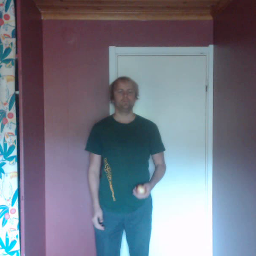

In [10]:
df.iloc[0, -1]

In [46]:
video = cv2.VideoWriter(df.iloc[0, 0][:-4] + '.avi', 0, 25, df.iloc[0, -1].size)

In [47]:
for _, frame_row in df.iterrows():
    frame = np.array(frame_row[-1])
    frame[frame_row[2]-5:frame_row[2]+5, frame_row[1]-5:frame_row[1]+5, 0] = 255
    frame[frame_row[4]-5:frame_row[4]+5, frame_row[3]-5:frame_row[3]+5, 1] = 255
    frame[frame_row[6]-5:frame_row[6]+5, frame_row[5]-5:frame_row[5]+5, 2] = 255
    video.write(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [48]:
video.release()